In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
# nelder-mead optimization of noisy one-dimensional convex function
from scipy.optimize import minimize
from numpy.random import rand
from scipy import interpolate
import itertools
import time
from scipy import signal
import datetime
from datetime import timedelta, date
import xarray as xr

In [2]:
path_import = '/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Data/'

In [3]:
df_vel_long_term=pd.read_table(path_import+'velocity/vel_long_term_KNG6.csv', header=[0], parse_dates=[0, 1])

In [4]:
df_vel_long_term

,From:,To:,Days:,E diff,N diff,Ht diff,HA,HV,VV
0,2004-04-21,2005-04-20,364,-5.218,2.880,-0.511,-61.1 º,5.98,-0.51
1,2004-04-28,2005-04-20,357,-5.168,2.866,-0.444,-61.0 º,6.04,-0.45
2,2005-04-20,2006-04-20,365,-5.347,3.269,0.179,-58.6 º,6.27,0.18
3,2006-04-20,2007-04-22,367,-5.085,2.834,0.219,-60.9 º,5.79,0.22
4,2007-04-26,2008-04-29,369,-5.487,3.039,0.231,-61.0 º,6.20,0.23
5,2008-04-24,2009-04-23,364,-4.785,2.702,0.340,-60.6 º,5.51,0.34
6,2009-04-23,2010-04-14,356,-5.784,3.887,0.125,-56.1 º,7.14,0.13
7,2010-04-15,2011-01-04,351,-4.358,2.342,0.065,-61.7 º,5.14,0.07
8,2011-01-04,2012-04-13,378,-6.025,3.308,0.139,-61.2 º,6.64,0.13
9,2012-04-13,2013-04-15,367,-5.024,2.593,0.060,-62.7 º,5.62,0.06


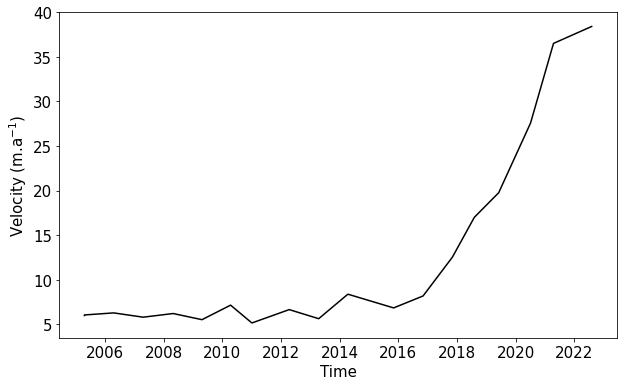

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df_vel_long_term['To:'], df_vel_long_term['HV'], 'k')
ax.tick_params(labelsize=15)
ax.set_ylabel('Velocity (m.a$^{-1}$)', fontsize=15)
ax.set_xlabel('Time', fontsize=15)
plt.savefig('/home/colili/Documents/PhD/ploughmeter_project/processing_2122/Figure/Figure_clean_paper/velocity_long_term.pdf', bbox_inches='tight')